# ohsome quality analyst (OQT) 

OQT provides quality estimations of OpenStreetMap (OSM) data.
OQT calls those estimations Indicators.
Indicators are computed for a specific area (`bpolys`) and a certain set of aggregated OSM features (`layer`).

Two intrinsic quality estimation OQT offers are the Mapping Saturation indicator and the Currentness indicator.

## API Request Examples using Python

Below Python is used to make requests to the OQT API.

### Mapping Saturation Indicator

The Mapping Saturation indicator calculate the saturation of mapping activity within the last 3 years.
It is based on the premise that each aggregation of features (e.g. length of roads or count of buildings) has a maximum. After increased mapping activity saturation is reached near this maximum.
The Mapping Saturation indicator works well with following layers:

- Building Count (`building_count`)
- Major Roads Length (`major_roads_length`)
- Amenities (`amenities`)
- Point-of-Interests (`poi`)

In [17]:
import json

from IPython.display import SVG, display
import requests
from termcolor import colored


def display_results(feature):
    """Helper function to display OQT API response."""
    name = feature["properties"]["name"]
    label = feature["properties"]["result"]["label"]
    color = feature["properties"]["result"]["label"]
    description = feature["properties"]["result"]["description"]
    svg = feature["properties"]["result"]["svg"]

    # print(json.dumps(result, indent=4))
    print(name)
    print("-" * len(name))
    print("Quality Label: " + colored(label, color))
    print("Result Description: " + description)
    display(SVG(svg))

Berlin
------
Quality Label: green
Result Description: The saturation of the last 3 years is 98.75%.
High saturation has been reached (97% < Saturation ≤ 100%).



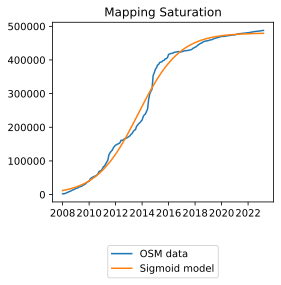

In [18]:
import json

import requests


base_url = "https://oqt.ohsome.org/api"
endpoint = "/indicator"
url = base_url + endpoint

with open("germany-berlin.geojson", "r") as file:
    bpolys = json.load(file)

parameters = {
    "name": "MappingSaturation",
    "layerKey": "building_count",
    "bpolys": bpolys,
    "includeSvg": True,
}

response = requests.post(url, json=parameters)
response.raise_for_status()  # Raise an Exception if HTTP Status Code is not 200

display_results(response.json())

### Currentness Indicator

The Currentness indicator works well with following layers:

- Building Count (`building_count`)
- Major Roads Count (`major_roads_count`)
- Amenities (`amenities`)

Berlin
------
Quality Label: yellow
Result Description: In the last 3 years 29.51 % of the elements were edited the last time.
In the period from 4 to 7 years ago 26.82 % of the elements were edited the last time.
The remaining 43.67 % were last edited more than 8 years ago.
The median currentness of the 554099 features (Building Count) is 6 year(s).
It is likely that some features are up-to-date and some features are outdated.



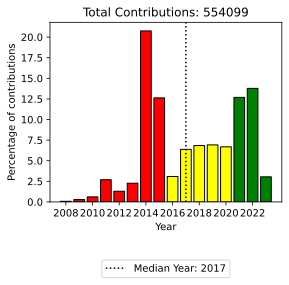

In [19]:
import json

import requests


base_url = "https://oqt.ohsome.org/api"
endpoint = "/indicator"
url = base_url + endpoint

with open("germany-berlin.geojson", "r") as file:
    bpolys = json.load(file)

parameters = {
    "name": "Currentness",
    "layerKey": "building_count",
    "bpolys": bpolys,
    "includeSvg": True,
}

response = requests.post(url, json=parameters)
response.raise_for_status()  # Raise an Exception if HTTP Status Code is not 200

display_results(response.json())

### Mapping Saturation Indicator for all districts in Berlin

The previous requests have been about one Area-of-Intrest


Lichtenberg
-----------
Quality Label: yellow
Result Description: The saturation of the last 3 years is 94.93%.
Saturation is in progress (30% < Saturation ≤ 97%).



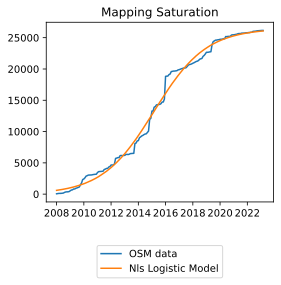

Charlottenburg-Wilmersdorf
--------------------------
Quality Label: yellow
Result Description: The saturation of the last 3 years is 92.57%.
Saturation is in progress (30% < Saturation ≤ 97%).



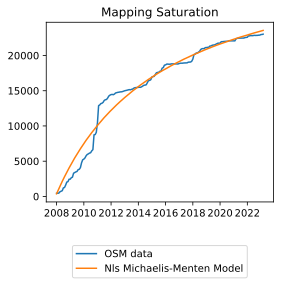

Pankow
------
Quality Label: green
Result Description: The saturation of the last 3 years is 100.0%.
High saturation has been reached (97% < Saturation ≤ 100%).



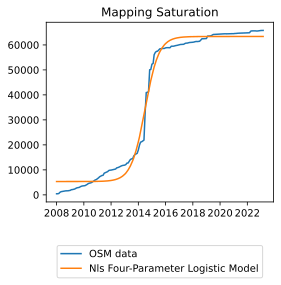

Marzahn-Hellersdorf
-------------------
Quality Label: green
Result Description: The saturation of the last 3 years is 99.92%.
High saturation has been reached (97% < Saturation ≤ 100%).



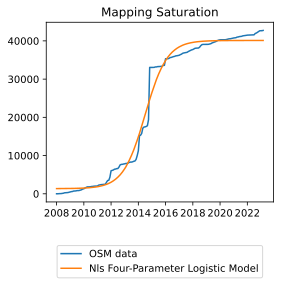

Neukölln
--------
Quality Label: green
Result Description: The saturation of the last 3 years is 99.3%.
High saturation has been reached (97% < Saturation ≤ 100%).



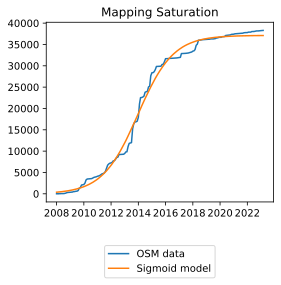

Tempelhof-Schöneberg
--------------------
Quality Label: green
Result Description: The saturation of the last 3 years is 99.8%.
High saturation has been reached (97% < Saturation ≤ 100%).



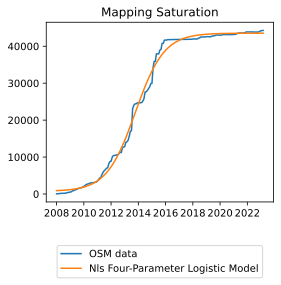

Friedrichshain-Kreuzberg
------------------------
Quality Label: yellow
Result Description: The saturation of the last 3 years is 95.3%.
Saturation is in progress (30% < Saturation ≤ 97%).



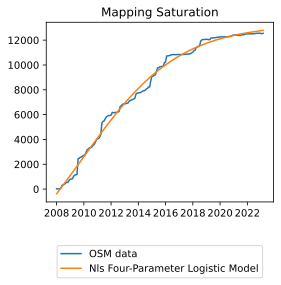

Treptow-Köpenick
----------------
Quality Label: green
Result Description: The saturation of the last 3 years is 99.2%.
High saturation has been reached (97% < Saturation ≤ 100%).



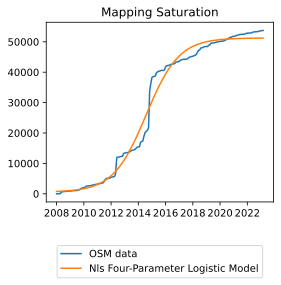

Steglitz-Zehlendorf
-------------------
Quality Label: green
Result Description: The saturation of the last 3 years is 99.0%.
High saturation has been reached (97% < Saturation ≤ 100%).



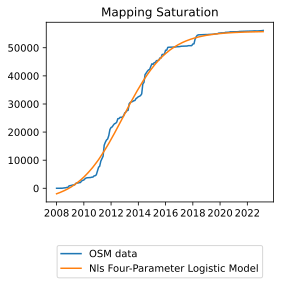

Mitte
-----
Quality Label: yellow
Result Description: The saturation of the last 3 years is 92.16%.
Saturation is in progress (30% < Saturation ≤ 97%).



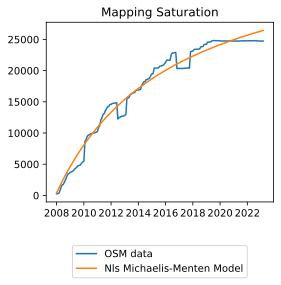

Spandau
-------
Quality Label: green
Result Description: The saturation of the last 3 years is 99.16%.
High saturation has been reached (97% < Saturation ≤ 100%).



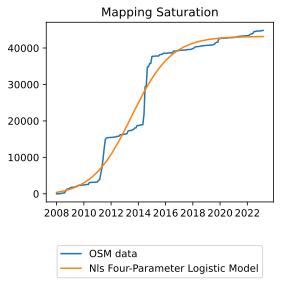

Reinickendorf
-------------
Quality Label: green
Result Description: The saturation of the last 3 years is 98.81%.
High saturation has been reached (97% < Saturation ≤ 100%).



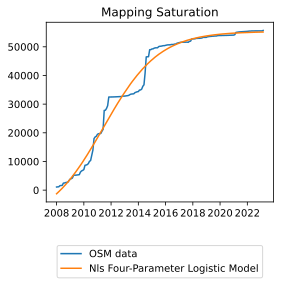

In [20]:
import json

import requests


base_url = "https://oqt.ohsome.org/api"
endpoint = "/indicator"
url = base_url + endpoint

# load districts as GeoJSON FeatureCollection
with open("germany-berlin-districts.geojson", "r") as file:
    bpolys = json.load(file)

parameters = {
    "name": "MappingSaturation",
    "layerKey": "building_count",
    "bpolys": bpolys,
    "includeSvg": True,
}

response = requests.post(url, json=parameters)
response.raise_for_status()  # Raise an Exception if HTTP Status Code is not 200

features = response.json()["features"]
for feature in features:
    display_results(feature)

In [8]:
# TODO: Request to ohsome API and send data to OQT API
# one for highway=cycleway 
# one for cycleway=* (insbesondere cycleway=lane) bzw. präziser cycleway:both=* oder cycleway:right=* oder cycleway:left=* 
# see also https://wiki.openstreetmap.org/wiki/Berlin/Verkehrswende/Radwege